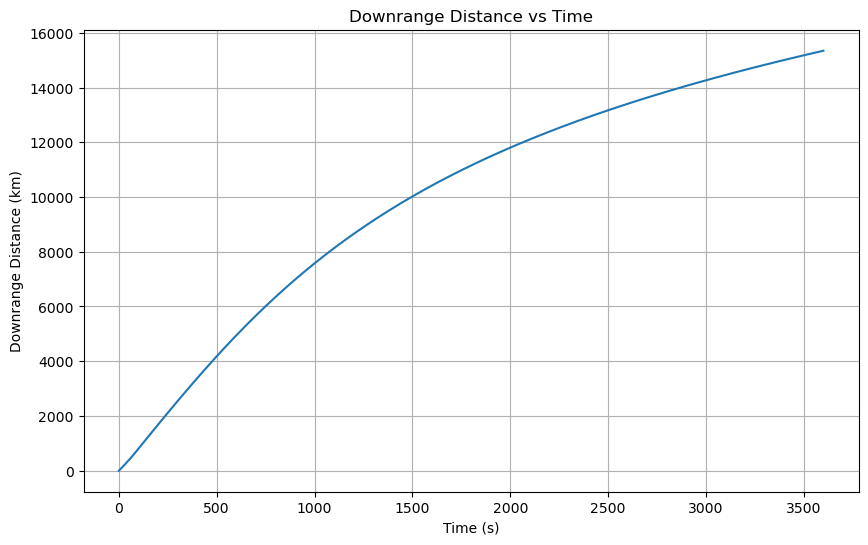

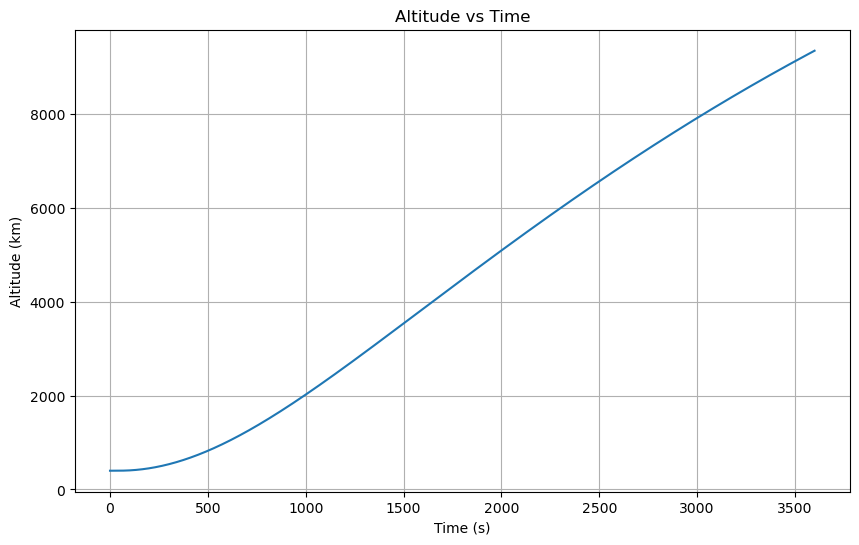

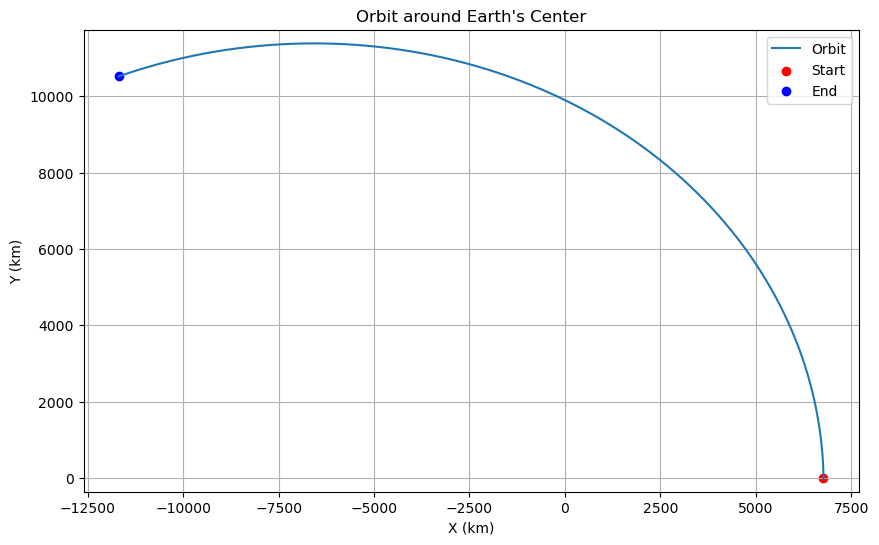

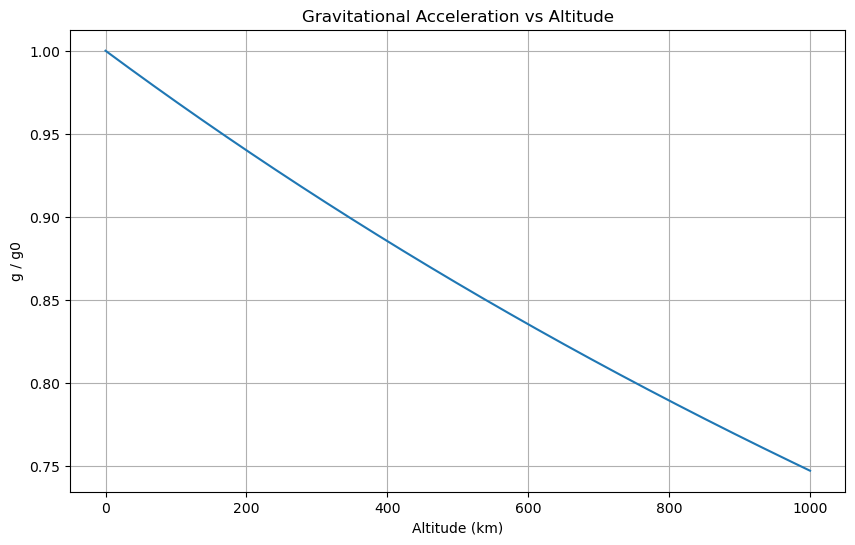

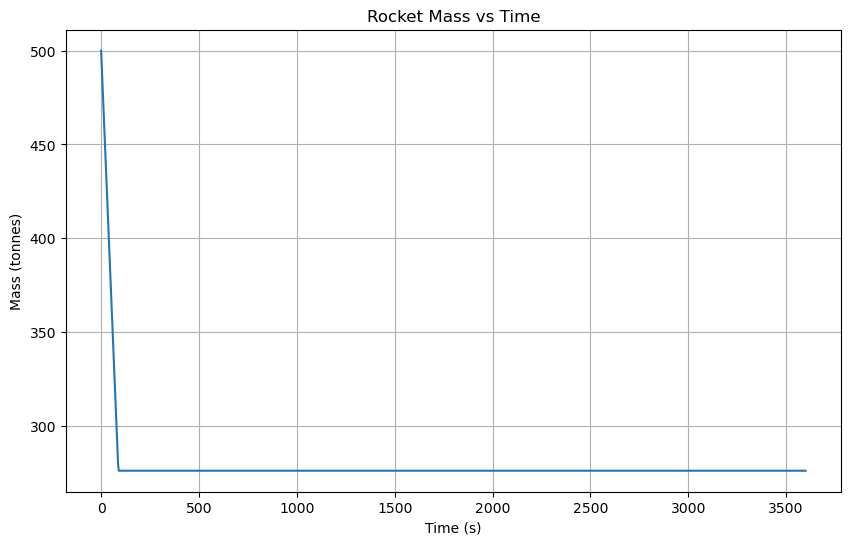

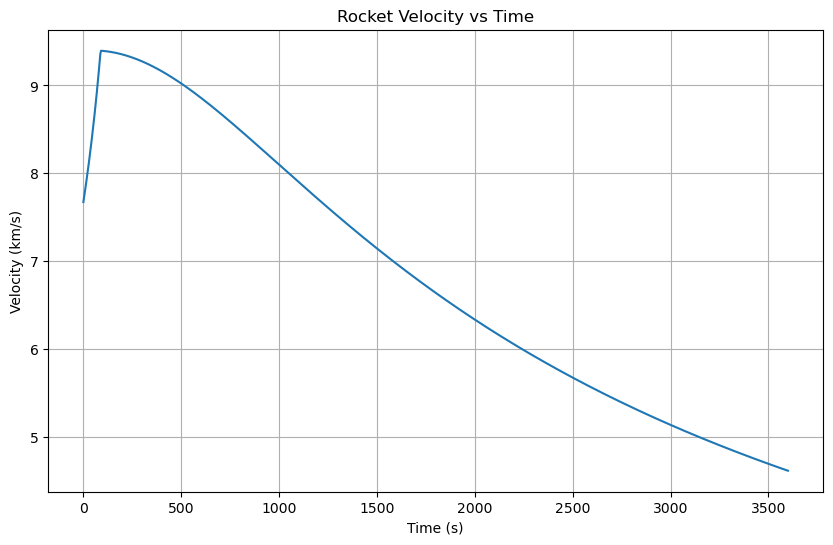

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
M_E = 5.974e24  # mass of Earth (kg)
G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
R_E = 6371e3  # radius of Earth (m)
Isp = 300  # specific impulse (s)
g0 = G * M_E / R_E**2  # gravitational acceleration at Earth's surface (m/s^2)
c = Isp * g0  # effective exhaust velocity (m/s)
A_e = 1.0  # exit area of the nozzle (m^2), assumed
p_a = 101325  # atmospheric pressure at sea level (Pa)
p_e = 0  # exhaust pressure, assumed vacuum for simplicity

# Initial conditions
h0 = 400e3  # initial altitude (m), 400 km above Earth's surface
v_orbital = np.sqrt(G * M_E / (R_E + h0))  # initial orbital velocity (m/s)
v0 = v_orbital  # set initial velocity to orbital velocity
gamma0 = np.radians(0)  # initial flight path angle (radians), horizontal launch
x0 = 0  # initial downrange distance (m)
m_wet = 500e3  # initial wet mass (kg)
m_dry = 50e3  # dry mass (kg)
T = 7.5e6  # initial thrust (N)

# Time span
t = np.linspace(0, 3600, 1000)  # 3600 seconds, 1000 points

# Gravitational acceleration as a function of altitude
def gravity(h):
    return g0 * (R_E**2 / (R_E + h)**2)

# Differential equations
def rocket_dynamics(y, t, c, A_e, p_a, p_e, m_dry, T):
    v, gamma, x, h, m = y
    g = gravity(h)
    if t <= 88:
        if m > m_dry:
            mdot_e = T / c  # mass flow rate (kg/s)
        else:
            mdot_e = 0  # no more propellant to burn
    else:
        mdot_e = 0  # stop mass flow after 88 seconds
        m = m_dry  # set mass to dry mass

    T_dynamic = mdot_e * (c + (p_e - p_a) * A_e / mdot_e) if mdot_e != 0 else 0
    dvdt = (T_dynamic / m) - g * np.sin(gamma)
    if v == 0:
        dgamma_dt = 0
    else:
        dgamma_dt = -(1 / v) * (g - (v**2 / (R_E + h))) * np.cos(gamma)
    dxdt = (R_E / (R_E + h)) * v * np.cos(gamma)
    dhdt = v * np.sin(gamma)
    dmdt = -mdot_e  # rate of mass consumption
    return [dvdt, dgamma_dt, dxdt, dhdt, dmdt]

# Initial state
y0 = [v0, gamma0, x0, h0, m_wet]

# Integrate the equations over the time grid
solution = odeint(rocket_dynamics, y0, t, args=(c, A_e, p_a, p_e, m_dry, T))

# Extract the results
v, gamma, x, h, m = solution.T

# Plotting downrange distance vs time
plt.figure(figsize=(10, 6))
plt.plot(t, x / 1e3)  # convert downrange distance to kilometers for readability
plt.title('Downrange Distance vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Downrange Distance (km)')
plt.grid(True)
plt.show()

# Plotting altitude vs time
plt.figure(figsize=(10, 6))
plt.plot(t, h / 1e3)  # convert altitude to kilometers for readability
plt.title('Altitude vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.show()

# Plotting the orbit around Earth's center with start and end points indicated
r = R_E + h  # radial distance from Earth's center
theta = x / R_E  # angle in radians

X = r * np.cos(theta)  # convert to Cartesian coordinates
Y = r * np.sin(theta)

plt.figure(figsize=(10, 6))
plt.plot(X / 1e3, Y / 1e3, label='Orbit')  # convert to kilometers for readability
plt.scatter(X[0] / 1e3, Y[0] / 1e3, color='red', label='Start')  # starting point
plt.scatter(X[-1] / 1e3, Y[-1] / 1e3, color='blue', label='End')  # terminal point
plt.title('Orbit around Earth\'s Center')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Plotting g as a function of altitude
z = np.linspace(0, 1000e3, 1000)  # altitude from 0 to 1000 km
g_z = gravity(z)
plt.figure(figsize=(10, 6))
plt.plot(z / 1e3, g_z / g0)  # plot g/g0
plt.title('Gravitational Acceleration vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('g / g0')
plt.grid(True)
plt.show()

# Plotting mass vs time
plt.figure(figsize=(10, 6))
plt.plot(t, m / 1e3)  # convert mass to tonnes for readability
plt.title('Rocket Mass vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Mass (tonnes)')
plt.grid(True)
plt.show()

# Plotting velocity vs time
plt.figure(figsize=(10, 6))
plt.plot(t, v / 1e3)  # convert velocity to km/s for readability
plt.title('Rocket Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (km/s)')
plt.grid(True)
plt.show()
